# Parsing Timestamps

### Convert Timestamp to Python Format

In [12]:
import pandas as pd

In [13]:
tags = pd.read_csv("./movielens/tags.csv")

In [14]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit = 's')

In [15]:
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05


In [17]:
tags.dtypes

userId                  int64
movieId                 int64
tag                    object
timestamp               int64
parsed_time    datetime64[ns]
dtype: object

   ## selecting rows based on Timestamp (creating a filter)

In [19]:
greater_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_t]
selected_rows.head()

,userId,movieId,tag,timestamp,parsed_time
8,15,100365,NaN,1425876220,2015-03-09 04:43:40
9,15,100365,documentary,1425876220,2015-03-09 04:43:40
10,15,100365,uganda,1425876220,2015-03-09 04:43:40
15,73,107999,action,1430799184,2015-05-05 04:13:04
16,73,107999,anime,1430799184,2015-05-05 04:13:04


In [22]:
tags.shape, selected_rows.shape

((1296, 5), (435, 5))

### Sorting the table using the timestamps

In [23]:
tags.sort_values(by = 'parsed_time', ascending = True)[:10]

,userId,movieId,tag,timestamp,parsed_time
338,353,35836,dumb,1137217440,2006-01-14 05:44:00
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
232,294,36401,fairy tales,1138983064,2006-02-03 16:11:04
229,294,6754,vampire,1138983469,2006-02-03 16:17:49
333,353,4721,As historicaly correct as Germany winning WW2,1140389056,2006-02-19 22:44:16
334,353,4721,but still a fun movie.,1140389056,2006-02-19 22:44:16
335,353,7376,"The Rocks ""finest"" work need I say more?",1140389511,2006-02-19 22:51:51
336,353,31221,Try not to mistake this for an episode of Alias,1140389595,2006-02-19 22:53:15
231,294,8865,unique look,1140395930,2006-02-20 00:38:50
230,294,8865,1940's feel,1140395930,2006-02-20 00:38:50


## Average Movie Ratings over Time

**Are Movie ratings related to the year of launch?**

In [76]:
ratings = pd.read_csv("./movielens/ratings.csv")
movies = pd.read_csv("./movielens/movies.csv")

In [77]:
movies['year'] = movies['title'].str.extract('.*\((.*)\),*', expand =True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [78]:
average_ratings = ratings[['movieId','rating']].groupby('movieId', as_index = False).mean()

In [79]:
average_ratings.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [80]:
joined = pd.merge(movies, average_ratings, on = 'movieId', how = 'inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995,3.267857


In [81]:
joined.corr()

,movieId,rating
movieId,1.000000,-0.041213
rating,-0.041213,1.000000


In [83]:
yearly_average = joined[['year','rating']].groupby('year', as_index = False).mean()
yearly_average.head()

,year,rating
0,1902,4.333333
1,1915,3.000000
2,1916,3.500000
3,1917,4.250000
4,1918,4.250000


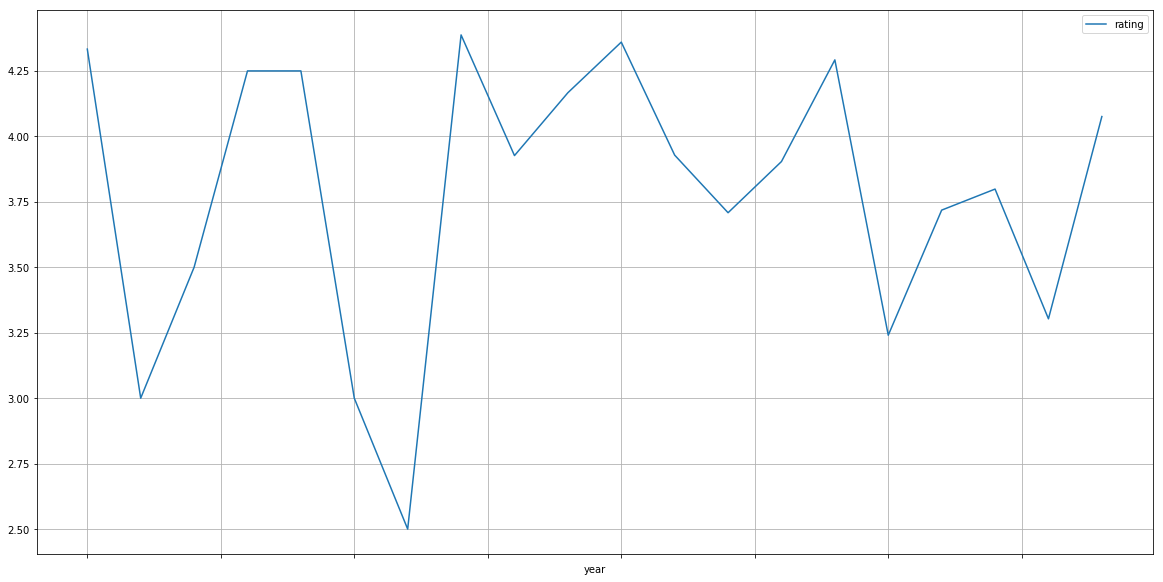

In [86]:
yearly_average[:20].plot(x = 'year', y = 'rating', figsize = (20, 10), grid = True)